# Homework 3
### OPER 685 - Machine Learning I
### Hosley, Brandon

In [1]:
%load_ext ipydex.displaytools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


## 1. (50 points) 
The file flight_delays.csv contains data on more than 2K flights. Each data point contains six features: scheduled departure hour, carrier, destination, origin, weather (i.e., raining, snowing, etc), day of the week, and day of the month. Each feature is measured on a nominal scale. Each data point also contains one response variable: flight status. Apply the Naïve Bayes formula to the entire data set (25 points for correct application) and address the comments and questions given below.

In [16]:
delays_df = pd.read_csv('flight_delays.csv', usecols=range(8))
raw_nb = {}
lap_nb = {}
# L = Sample size
L = delays_df.shape[0]

raw_nb['Flight Status'] = lap_nb['Flight Status'] = {
    'ontime': delays_df['Flight Status'].value_counts()['ontime']/L, 
    'delayed': delays_df['Flight Status'].value_counts()['delayed']/L}

#   Data structure:
# dict[column][feature][flight status]
n = delays_df['Flight Status'].value_counts()[0]
for col in delays_df.columns[0:-1]:
    raw_col = {}
    lap_col = {}
    m = len(delays_df[col].unique())
    for feat in delays_df[col].unique():
        raw_col[feat] = {}
        lap_col[feat] = {}
        #n = delays_df[col].value_counts()[feat]
        try:
            n_c,n_k = delays_df[[col,'Flight Status']].value_counts()[feat]
        except:
            try:
                n_c = delays_df[[col,'Flight Status']].value_counts()[feat]['ontime']
            except:
                n_c = 0
            try:
                n_k = delays_df[[col,'Flight Status']].value_counts()[feat]['delayed']
            except:
                n_k = 0
        finally:
            raw_col[feat]['ontime'] = n_c / n
            lap_col[feat]['ontime'] = (n_c + 1)/(n+m)
            raw_col[feat]['delayed'] = (n_k) / (L-n)
            lap_col[feat]['delayed'] = (n_k + 1)/(L-n+m)
    raw_nb[col] = raw_col
    lap_nb[col] = lap_col

def nb_prob(series, coeffs):
    if series['Flight Status']:
        series = series.drop(labels='Flight Status')
    p,q = coeffs['Flight Status'].values()
    for col,feat in series.items():
        pq = coeffs[col][feat]
        p = p* pq['ontime']
        q = q* pq['delayed']
    return p/(p+q)

print(raw_nb)
print(lap_nb)

{'Flight Status': {'ontime': 0.805542935029532, 'delayed': 0.19445706497046797}, 'Scheduled Departure Hour': {1400: {'ontime': 0.09757473209249859, 'delayed': 0.14719626168224298}, 1600: {'ontime': 0.0823463056965595, 'delayed': 0.07476635514018691}, 1200: {'ontime': 0.06711787930062042, 'delayed': 0.053738317757009345}, 1700: {'ontime': 0.10039481105470953, 'delayed': 0.14719626168224298}, 1000: {'ontime': 0.050197405527354765, 'delayed': 0.02570093457943925}, 800: {'ontime': 0.07670614777213762, 'delayed': 0.06074766355140187}, 2100: {'ontime': 0.05696559503666103, 'delayed': 0.08411214953271028}, 900: {'ontime': 0.05470953186689227, 'delayed': 0.02570093457943925}, 2000: {'ontime': 0.024816694867456288, 'delayed': 0.02102803738317757}, 1500: {'ontime': 0.06542583192329385, 'delayed': 0.08878504672897196}, 600: {'ontime': 0.06204173716864072, 'delayed': 0.037383177570093455}, 1800: {'ontime': 0.04060913705583756, 'delayed': 0.030373831775700934}, 1300: {'ontime': 0.0772701635645798, 

### A. (10 points) 
Compute and show the confusion matrix.

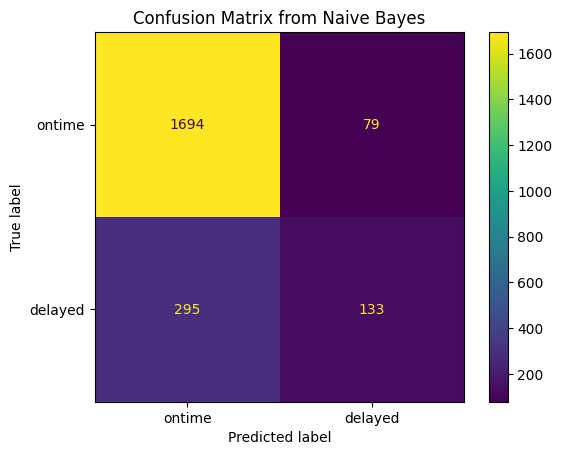

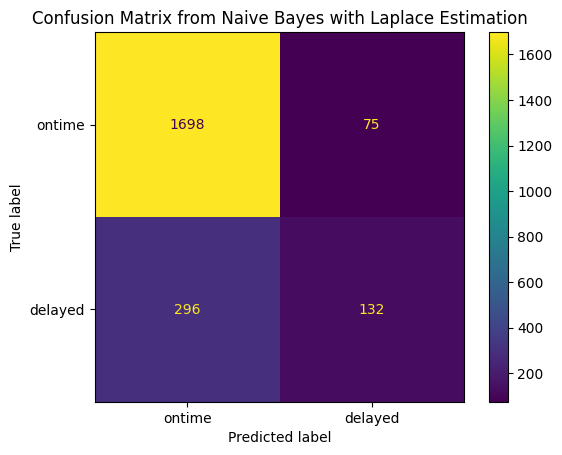

In [12]:
raw_probs = list(nb_prob(row, raw_nb) for _,row in delays_df.iterrows())
raw_preds = list('ontime' if round(a)==1 else 'delayed' for a in raw_probs)
cm_n = confusion_matrix(delays_df['Flight Status'], raw_preds, labels=delays_df['Flight Status'].unique())
disp_n = ConfusionMatrixDisplay(confusion_matrix=cm_n, display_labels=delays_df['Flight Status'].unique())
disp_n.plot()
plt.title('Confusion Matrix from Naive Bayes')
plt.show()

lap_probs = list(nb_prob(row, lap_nb) for _,row in delays_df.iterrows())
lap_preds = list('ontime' if round(a)==1 else 'delayed' for a in lap_probs)
cm_l = confusion_matrix(delays_df['Flight Status'], lap_preds, labels=delays_df['Flight Status'].unique())
disp_l = ConfusionMatrixDisplay(confusion_matrix=cm_l, display_labels=delays_df['Flight Status'].unique())
disp_l.plot()
plt.title('Confusion Matrix from Naive Bayes with Laplace Estimation')
plt.show()

### B. (5 points) 
What insights can you obtain from the confusion matrix? (Ensure you are using proper terminology and augmenting the terminology with "clear-text" explanations) 

The overall accuracy is improved with the laplace estimator. In both cases, the precision is quite high; the model is quite effective at identifying on-time flights correctly. The recall is lower, with a greater number of actually delayed flights predicted as being on time, in fact about 75% are incorrectly labeled. From this, it can be seen that the model favors the majority class significantly, as is often seen in asymmetric class distributions.

The F1 scores are almost exactly the same between the two.

### C. (5 points)
Suppose your upcoming flight has the following features:
|   |   |
|---|---|
| Scheduled departure hour: | 1600 |
| Carrier: | US |
| Destination: | LGA |
| Origin: | DCA |
| Weather: | yes (i.e.,1) |
| Day of the week:| 6 |
| Day of the month:| 1 |

Using the historical data and the Naïve Bayes formula, do you think your flight will be on time or delayed?

In [19]:
d= pd.Series({
    'Scheduled Departure Hour': 1600,
    'CARRIER': 'US',
    'DEST': 'LGA',
    'ORIGIN': 'DCA',
    'Weather': 1,
    'DAY_WEEK': 6,
    'DAY_OF_MONTH': 1  })

print(nb_prob(d, raw_nb))
print(nb_prob(d, lap_nb))

KeyError: 'Flight Status'

### D. (5 points) 
What is the probability associated with your prediction?

## Problem 2.
(50 points) The file wine.csv contains data on the results of a chemical analysis of 178 wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents (i.e., features) found in each of the three types of wines. The 13 features are: Alcohol, Malic Acid, Ash, Alcalinity, Magnesium, Total Phenols, Flavanoids, Nonflavoniod Phenols, Proanthocyanins, Color Intensity, Hue, OB280, and Proline. The 14th column is a labeled category stating which of the three cultivars the wine belongs to.   

(20 points for correct application) Apply the k-NN algorithm to the data and address the comments and questions given below.

### A. (10 points) 
Find a good value for k.   Defend your choice using appropriate methodologies. 

### B. (10 points) 
Compute and show the confusion matrix.

### C. (5 points) 
What insights can you obtain from the confusion matrix? (Ensure you are using proper terminology and augmenting the terminology with "clear-text" explanations) 

### D. (5 points) 
Predict the wine cultivar of the following sample point:
Xsample= [11.96   1.63   2.43   17.1   93   2.8   2.74   0.53   1.46   2.6   0.99   3.69   880]